<a href="https://colab.research.google.com/github/BrandonLCC/UFC-ML/blob/main/UFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. ***CONJUNTOS DE DATOS DE LA UFC [1994-2025]***






















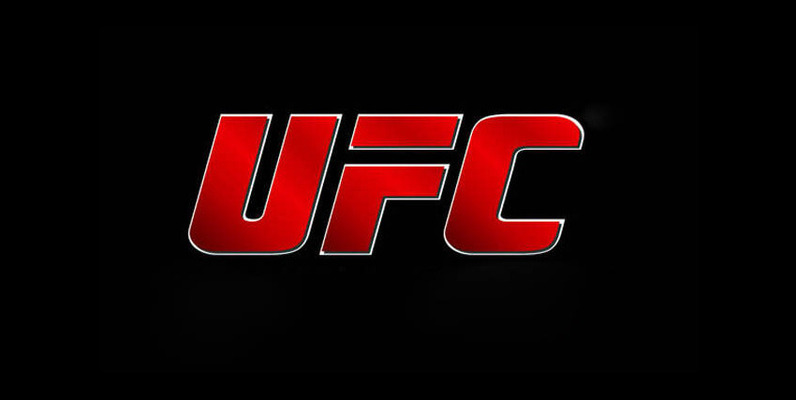

#### 2. **Abstract**

(es un resumen completo de todo lo que vamos a realizar. No es una introduccion)

Se realiza La prueba de hipótesis es el proceso de elegir entre dos hipótesis contradictorias...

https://pubmed.ncbi.nlm.nih.gov/8900794/

### 3. **Objetivos**

##### **Objetivo principal**

El objetivo principal de esta investigación es realizar un modelado probabilístico utilizando técnicas de Machine Learning que permita predecir el resultado de los combates **(ganados o perdidos)** y la **duración de un combate** en función de ciertas características de los luchadores o de las acciones realizadas durante los combates.
Además, se propone implementar tres tipos de modelado: regresión, clasificación y creación de clústeres.

**Objetivos específicos**

1. Realizar una investigación exploratoria y rigurosa (EDA) del conjunto de datos para evaluar la calidad, cantidad y veracidad de la información, y posteriormente llevar a cabo la limpieza, imputación e identificación de datos nulos o duplicados.

2. Obtener y evaluar las métricas de desempeño de los modelos de clasificación y regresión, con el fin de identificar su nivel de confiabilidad y precisión.

3. Aplicar técnicas como el ajuste de hiperparámetros (Grid Search y Random Search) para optimizar los modelos, así como métodos de reducción de dimensionalidad (PCA y/o UMAP), con el objetivo de lograr predicciones más precisas y de calidad.

#### 4. **Hipótesis** ()

**Hipotesis para la variable de regresion**


**Pregunta de investigación:** ¿Las acciónes o el fisicio del luchador de la UFC define si gana o pierde un combate?

*Hipótesis nula (H0)*:

*Hipótesis alternativa (H1):*

**Hipotesis para la variable de clasificacion**

**Pregunta de investigación:** ¿Las acciónes o el fisicio del luchador de la UFC define si gana o pierde un combate?

*Hipótesis nula (H0)*:

*Hipótesis alternativa (H1):*

#### 5. **Metodología**

#### **Descripción de la fuente de información y dataset**

La UFC (Ultimate Fighting Championship) es la mayor organización de artes marciales mixtas (MMA) del mundo, con sede en Las Vegas, Nevada. Esta empresa promueve combates entre luchadores de élite que utilizan una variedad de técnicas de combate tanto de pie como en el suelo, como boxeo, jiu-jitsu y lucha libre.

El conjunto de datos de la UFC, utilizado para esta investigación, fue obtenido de [Kaggle](Kaggle.com), una plataforma que ofrece gran variedad de casos para diversos proyectos.

El dataset contiene cerca de 8.000 filas y 124 columnas, con información detallada sobre los combates, como el número de peleas ganadas o perdidas, cantidad de golpes, técnicas utilizadas, peso, altura y otros atributos relevantes.

**Fuente original:** [Kaggle - UFC](https://www.kaggle.com/datasets/neelagiriaditya/ufc-datasets-1994-2025/data)


**Datos crudos extraidos:** [ufcstats.com](http://ufcstats.com/statistics/events/completed)

#### **Herramientas**

Librerias


Graficos

Metricas:

Modelo

Entorno de ejecucion

Github:

Drive

ipynb

lenguaje + version




### **Carga y preparación de datos**

### **Importaciones**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# -- Metricas modelos de regresion --
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# -- Metricas para modelos de clasificación --
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

#----  Curva ROC y PR ----
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

# -- GridSearchCV --
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=",")

Saving UFC.csv to UFC.csv


In [ ]:
df.head(5)

event_id                            event_name        date  \
0  6e380a4d73ab4f0e  UFC Fight Night: Imavov vs. Borralho  2025/09/06   
1  6e380a4d73ab4f0e  UFC Fight Night: Imavov vs. Borralho  2025/09/06   
2  6e380a4d73ab4f0e  UFC Fight Night: Imavov vs. Borralho  2025/09/06   
3  6e380a4d73ab4f0e  UFC Fight Night: Imavov vs. Borralho  2025/09/06   
4  6e380a4d73ab4f0e  UFC Fight Night: Imavov vs. Borralho  2025/09/06   

                       location          fight_id           division  \
0  Paris, Ile-de-France, France  d14fea43712707f0        lightweight   
1  Paris, Ile-de-France, France  5bcd8abf6da01dae       middleweight   
2  Paris, Ile-de-France, France  0149e875b31e57f8  light heavyweight   
3  Paris, Ile-de-France, France  69b31593175f77ec        lightweight   
4  Paris, Ile-de-France, France  a47123ae6e048f11       welterweight   

   title_fight                method  finish_round  match_time_sec  ...  \
0            0            Submission             2             176  ...   
1            0  Decision - Unanimous             5             300  ...   
2            0                KO/TKO             1             300  ...   
3            0                KO/TKO             2             198  ...   
4            0                KO/TKO             3             122  ...   

   b_splm b_str_acc b_sapm b_str_def  b_td_avg  b_td_avg_acc  b_td_def  \
0    3.84        57   4.16        60      0.00             0        84   
1    3.44        56   2.50        60      1.28            48        76   
2    2.50        45   3.04        43      1.43            18        35   
3    5.71        41   4.47        50      4.17            55        81   
4    4.71        40   7.15        47      0.00             0        47   

   b_sub_avg              winner         winner_id  
0        0.0  Benoit Saint Denis  c2299ec916bc7c56  
1        0.4  Nassourdine Imavov  881bf86d4cba8578  
2        1.3  Modestas Bukauskas  476fe566d2df676e  
3        0.2         Mason Jones  f6ad6a1e4d600e0d  
4        0.0           Axel Sola  1d2d98ddd05b38fb  

[5 rows x 124 columns]

#### **Limpieza**

#### **Eliminación de columnas**

- Se eliminan las columnas de identificación (ID), ya que no aportan información relevante al análisis ni contribuyen al cumplimiento de los objetivos de esta investigación.

- Asimismo, se eliminan las columnas relacionadas con el contexto externo de las peleas, como location, referee y event_name, dado que el enfoque del estudio se centra exclusivamente en las características y resultados de los combates de la UFC, y no en factores externos o logísticos del evento.

In [ ]:
irrelevant_cols = [
    'event_id', 'event_name', 'location', 'fight_id', 'referee', 'r_id', 'r_nick_name', 'b_id', 'b_nick_name', 'winner_id'
]

# Drop the irrelevant columns
df = df.drop(columns=irrelevant_cols)

# Display the remaining columns and their info to confirm the changes
print("Columns remaining after dropping irrelevant ones:")
print(df.columns)
df.info()

Columns remaining after dropping irrelevant ones:
Index(['fecha', 'division', 'pelea_por_titulo', 'metodo_victoria',
       'ronda_final', 'tiempo_pelea_seg', 'rondas_totales',
       'nombre_peleador_rojo', 'r_knockdowns',
       'r_golpes_significativos_conectados',
       ...
       'b_precision_golpes', 'b_golpes_absorbidos_por_min', 'b_defensa_golpes',
       'b_derribos_promedio_por_pelea', 'b_precision_promedio_derribos',
       'b_defensa_derribos', 'b_sumisiones_promedio_por_pelea', 'ganador',
       'ganador_red_blue', 'target'],
      dtype='object', length=116)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Columns: 116 entries, fecha to target
dtypes: float64(87), int64(18), object(11)
memory usage: 7.4+ MB


#### **Renombramiento de columnas**

Se realiza un cambio en los nombres  de las columnas para que se pueda identificar claramente su descripción.

In [ ]:
new_column_names = {
    'date': 'fecha',
    'division': 'division',
    'title_fight': 'pelea_por_titulo',
    'method': 'metodo_victoria',
    'finish_round': 'ronda_final',
    'match_time_sec': 'tiempo_pelea_seg',
    'total_rounds': 'rondas_totales',
    'r_name': 'nombre_peleador_rojo',
    'r_kd': 'r_knockdowns',
    'r_sig_str_landed': 'r_golpes_significativos_conectados',
    'r_sig_str_atmpted': 'r_golpes_significativos_intentados',
    'r_sig_str_acc': 'r_precision_golpes_significativos',
    'r_total_str_landed': 'r_golpes_totales_conectados',
    'r_total_str_atmpted': 'r_golpes_totales_intentados',
    'r_total_str_acc': 'r_precision_golpes_totales',
    'r_td_landed': 'r_derribos_conectados',
    'r_td_atmpted': 'r_derribos_intentados',
    'r_td_acc': 'r_precision_derribos',
    'r_sub_att': 'r_intentos_sumision',
    'r_ctrl': 'r_control_seg',
    'r_head_landed': 'r_cabeza_conectados',
    'r_head_atmpted': 'r_cabeza_intentados',
    'r_head_acc': 'r_precision_cabeza',
    'r_body_landed': 'r_cuerpo_conectados',
    'r_body_atmpted': 'r_cuerpo_intentados',
    'r_body_acc': 'r_precision_cuerpo',
    'r_leg_landed': 'r_pierna_conectados',
    'r_leg_atmpted': 'r_pierna_intentados',
    'r_leg_acc': 'r_precision_pierna',
    'r_dist_landed': 'r_distancia_conectados',
    'r_dist_atmpted': 'r_distancia_intentados',
    'r_dist_acc': 'r_precision_distancia',
    'r_clinch_landed': 'r_clinch_conectados',
    'r_clinch_atmpted': 'r_clinch_intentados',
    'r_clinch_acc': 'r_precision_clinch',
    'r_ground_landed': 'r_suelo_conectados',
    'r_ground_atmpted': 'r_suelo_intentados',
    'r_ground_acc': 'r_precision_suelo',
    'r_landed_head_per': 'r_perc_cabeza_conectados',
    'r_landed_body_per': 'r_perc_cuerpo_conectados',
    'r_landed_leg_per': 'r_perc_pierna_conectados',
    'r_landed_dist_per': 'r_perc_distancia_conectados',
    'r_landed_clinch_per': 'r_perc_clinch_conectados',
    'r_landed_ground_per': 'r_perc_suelo_conectados',
    'r_wins': 'r_victorias',
    'r_losses': 'r_derrotas',
    'r_draws': 'r_empates',
    'r_height': 'r_altura_cm',
    'r_weight': 'r_peso_kg',
    'r_reach': 'r_alcance_cm',
    'r_stance': 'r_postura',
    'r_dob': 'r_fecha_nacimiento',
    'r_splm': 'r_golpes_significativos_por_min',
    'r_str_acc': 'r_precision_golpes',
    'r_sapm': 'r_golpes_absorbidos_por_min',
    'r_str_def': 'r_defensa_golpes',
    'r_td_avg': 'r_derribos_promedio_por_pelea',
    'r_td_avg_acc': 'r_precision_promedio_derribos',
    'r_td_def': 'r_defensa_derribos',
    'r_sub_avg': 'r_sumisiones_promedio_por_pelea',
    'b_name': 'nombre_peleador_azul',
    'b_kd': 'b_knockdowns',
    'b_sig_str_landed': 'b_golpes_significativos_conectados',
    'b_sig_str_atmpted': 'b_golpes_significativos_intentados',
    'b_sig_str_acc': 'b_precision_golpes_significativos',
    'b_total_str_landed': 'b_golpes_totales_conectados',
    'b_total_str_atmpted': 'b_golpes_totales_intentados',
    'b_total_str_acc': 'b_precision_golpes_totales',
    'b_td_landed': 'b_derribos_conectados',
    'b_td_atmpted': 'b_derribos_intentados',
    'b_td_acc': 'b_precision_derribos',
    'b_sub_att': 'b_intentos_sumision',
    'b_ctrl': 'b_control_seg',
    'b_head_landed': 'b_cabeza_conectados',
    'b_head_atmpted': 'b_cabeza_intentados',
    'b_head_acc': 'b_precision_cabeza',
    'b_body_landed': 'b_cuerpo_conectados',
    'b_body_atmpted': 'b_cuerpo_intentados',
    'b_body_acc': 'b_precision_cuerpo',
    'b_leg_landed': 'b_pierna_conectados',
    'b_leg_atmpted': 'b_pierna_intentados',
    'b_leg_acc': 'b_precision_pierna',
    'b_dist_landed': 'b_distancia_conectados',
    'b_dist_atmpted': 'b_distancia_intentados',
    'b_dist_acc': 'b_precision_distancia',
    'b_clinch_landed': 'b_clinch_conectados',
    'b_clinch_atmpted': 'b_clinch_intentados',
    'b_clinch_acc': 'b_precision_clinch',
    'b_ground_landed': 'b_suelo_conectados',
    'b_ground_atmpted': 'b_suelo_intentados',
    'b_ground_acc': 'b_precision_suelo',
    'b_landed_head_per': 'b_perc_cabeza_conectados',
    'b_landed_body_per': 'b_perc_cuerpo_conectados',
    'b_landed_leg_per': 'b_perc_pierna_conectados',
    'b_landed_dist_per': 'b_perc_distancia_conectados',
    'b_landed_clinch_per': 'b_perc_clinch_conectados',
    'b_landed_ground_per': 'b_perc_suelo_conectados',
    'b_wins': 'b_victorias',
    'b_losses': 'b_derrotas',
    'b_draws': 'b_empates',
    'b_height': 'b_altura_cm',
    'b_weight': 'b_peso_kg',
    'b_reach': 'b_alcance_cm',
    'b_stance': 'b_postura',
    'b_dob': 'b_fecha_nacimiento',
    'b_splm': 'b_golpes_significativos_por_min',
    'b_str_acc': 'b_precision_golpes',
    'b_sapm': 'b_golpes_absorbidos_por_min',
    'b_str_def': 'b_defensa_golpes',
    'b_td_avg': 'b_derribos_promedio_por_pelea',
    'b_td_avg_acc': 'b_precision_promedio_derribos',
    'b_td_def': 'b_defensa_derribos',
    'b_sub_avg': 'b_sumisiones_promedio_por_pelea',
    'winner': 'ganador'
}

df = df.rename(columns=new_column_names)
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['event_id', 'event_name', 'fecha', 'location', 'fight_id', 'division',
       'pelea_por_titulo', 'metodo_victoria', 'ronda_final',
       'tiempo_pelea_seg',
       ...
       'b_golpes_significativos_por_min', 'b_precision_golpes',
       'b_golpes_absorbidos_por_min', 'b_defensa_golpes',
       'b_derribos_promedio_por_pelea', 'b_precision_promedio_derribos',
       'b_defensa_derribos', 'b_sumisiones_promedio_por_pelea', 'ganador',
       'winner_id'],
      dtype='object', length=124)


#### **Preparación o transformación de datos (Feature Engineering)**

Preparación de la variable objetivo `ganar` para la creacion del modelo de  clasificación

En lugar de que la variable objetivo contenga los nombres de los ganadores, se realizará una transformación creando dos clases:

- **Clase 0:** ganador azul

- **Clase 1:** ganador rojo

Para esta variable objetivo se construirá un modelo de clasificación binaria, ya que solo existen dos posibles resultados.

**Posibles modelo:** R logisitca, Arbol de decision, random forest, KNN o XGBoost.

In [ ]:
df['ganador_red_blue'] = df.apply(lambda row: 'rojo' if row['ganador'] == row['nombre_peleador_rojo'] else 'azul', axis=1)

display(df[['nombre_peleador_rojo', 'nombre_peleador_azul', 'ganador', 'ganador_red_blue']].head())


nombre_peleador_rojo nombre_peleador_azul             ganador  \
0   Benoit Saint Denis       Mauricio Ruffy  Benoit Saint Denis   
1   Nassourdine Imavov        Caio Borralho  Nassourdine Imavov   
2   Modestas Bukauskas           Paul Craig  Modestas Bukauskas   
3           Bolaji Oki          Mason Jones         Mason Jones   
4            Axel Sola           Rhys McKee           Axel Sola   

  ganador_red_blue  
0             rojo  
1             rojo  
2             rojo  
3             azul  
4             rojo

In [ ]:
df['target'] = df.apply(lambda row: 1 if row['ganador'] == row['nombre_peleador_rojo'] else 0, axis=1)

display(df[['nombre_peleador_rojo', 'nombre_peleador_azul', 'ganador', 'target']].head())

nombre_peleador_rojo nombre_peleador_azul             ganador  target
0   Benoit Saint Denis       Mauricio Ruffy  Benoit Saint Denis       1
1   Nassourdine Imavov        Caio Borralho  Nassourdine Imavov       1
2   Modestas Bukauskas           Paul Craig  Modestas Bukauskas       1
3           Bolaji Oki          Mason Jones         Mason Jones       0
4            Axel Sola           Rhys McKee           Axel Sola       1

**Manejo de nulos y outliers**

In [ ]:
# Identify columns with missing values and their percentage
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100
missing_values_info = pd.DataFrame({'Valores Nulos': missing_values, 'Porcentaje Nulos (%)': missing_values_percent})
missing_values_info = missing_values_info[missing_values_info['Valores Nulos'] > 0].sort_values(by='Porcentaje Nulos (%)', ascending=False)

print("Columnas con valores nulos y su porcentaje:")
display(missing_values_info)

# Drop columns with more than 30% missing values
cols_to_drop = missing_values_info[missing_values_info['Porcentaje Nulos (%)'] > 30].index
df = df.drop(columns=cols_to_drop)
print(f"\nColumnas eliminadas (más del 30% de nulos): {list(cols_to_drop)}")

# Impute missing numerical values with the median
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Verify that there are no more missing numerical values
print("\nVerificación de valores nulos después de la imputación:")
display(df.isnull().sum().sum())

Columnas con valores nulos y su porcentaje:


Valores Nulos  Porcentaje Nulos (%)
b_precision_suelo                  3816             45.771860
b_precision_derribos               3126             37.495502
r_precision_suelo                  2956             35.456399
r_precision_derribos               2686             32.217824
b_precision_clinch                 2042             24.493223
...                                 ...                   ...
b_perc_cabeza_conectados             21              0.251889
b_perc_clinch_conectados             21              0.251889
b_peso_kg                            19              0.227900
r_altura_cm                           5              0.059974
r_peso_kg                             3              0.035984

[84 rows x 2 columns]


Columnas eliminadas (más del 30% de nulos): ['b_precision_suelo', 'b_precision_derribos', 'r_precision_suelo', 'r_precision_derribos']

Verificación de valores nulos después de la imputación:


/tmp/ipython-input-1237646818.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


np.int64(494)

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot de {col}')
    plt.xlabel(col)
    plt.show()

#### **Estandarización/normalización**

### 8. **Análisis exploratorio (EDA)**

In [ ]:
df.head(3)

fecha           division  pelea_por_titulo       metodo_victoria  \
0  2025/09/06        lightweight                 0            Submission   
1  2025/09/06       middleweight                 0  Decision - Unanimous   
2  2025/09/06  light heavyweight                 0                KO/TKO   

   ronda_final  tiempo_pelea_seg  rondas_totales nombre_peleador_rojo  \
0            2               176             3.0   Benoit Saint Denis   
1            5               300             5.0   Nassourdine Imavov   
2            1               300             3.0   Modestas Bukauskas   

   r_knockdowns  r_golpes_significativos_conectados  \
0           0.0                                17.0   
1           0.0                                81.0   
2           0.0                                22.0   

   r_golpes_significativos_intentados  r_precision_golpes_significativos  \
0                                38.0                               44.0   
1                               162.0                               50.0   
2                                36.0                               61.0   

   r_golpes_totales_conectados  r_golpes_totales_intentados  \
0                         37.0                         61.0   
1                         89.0                        170.0   
2                         29.0                         44.0   

   r_precision_golpes_totales  r_derribos_conectados  r_derribos_intentados  \
0                        61.0                    3.0                   10.0   
1                        52.0                    0.0                    0.0   
2                        66.0                    0.0                    0.0   

   r_intentos_sumision  r_control_seg  r_cabeza_conectados  \
0                  1.0          278.0                  9.0   
1                  0.0           29.0                 53.0   
2                  0.0          110.0                 18.0   

   r_cabeza_intentados  r_precision_cabeza  r_cuerpo_conectados  \
0                 26.0                35.0                  8.0   
1                118.0                45.0                 14.0   
2                 30.0                60.0                  0.0   

   r_cuerpo_intentados  r_precision_cuerpo  r_pierna_conectados  \
0                 12.0                67.0                  0.0   
1                 26.0                54.0                 14.0   
2                  0.0                73.0                  4.0   

   r_pierna_intentados  r_precision_pierna  r_distancia_conectados  \
0                  0.0                89.0                     9.0   
1                 18.0                78.0                    79.0   
2                  6.0                67.0                    10.0   

   r_distancia_intentados  r_precision_distancia  r_clinch_conectados  \
0                    26.0                   35.0                  3.0   
1                   160.0                   49.0                  2.0   
2                    17.0                   59.0                  0.0   

   r_clinch_intentados  r_precision_clinch  r_suelo_conectados  \
0                  3.0               100.0                 5.0   
1                  2.0               100.0                 0.0   
2                  0.0                72.0                12.0   

   r_suelo_intentados  r_perc_cabeza_conectados  r_perc_cuerpo_conectados  \
0                 9.0                      52.0                      47.0   
1                 0.0                      65.0                      17.0   
2                19.0                      81.0                       0.0   

   r_perc_pierna_conectados  r_perc_distancia_conectados  \
0                       0.0                         52.0   
1                      17.0                         97.0   
2                      18.0                         45.0   

   r_perc_clinch_conectados  r_perc_suelo_conectados  r_victorias  r_derrotas  \
0                      17.0                     29.0     

In [ ]:
df.describe() #Por predeterminado muestra valores numericos y flotantes

pelea_por_titulo  ronda_final  tiempo_pelea_seg  rondas_totales  \
count       8337.000000  8337.000000       8337.000000     8306.000000   
mean           0.055176     2.353604        228.060813        3.135805   
std            0.228337     1.017928         97.303021        0.649625   
min            0.000000     1.000000          5.000000        1.000000   
25%            0.000000     1.000000        152.000000        3.000000   
50%            0.000000     3.000000        291.000000        3.000000   
75%            0.000000     3.000000        300.000000        3.000000   
max            1.000000     5.000000       1080.000000        5.000000   

       r_knockdowns  r_golpes_significativos_conectados  \
count   8316.000000                         8316.000000   
mean       0.243867                           39.152718   
std        0.515477                           33.115821   
min        0.000000                            0.000000   
25%        0.000000                           14.000000   
50%        0.000000                           31.000000   
75%        0.000000                           56.000000   
max        5.000000                          445.000000   

       r_golpes_significativos_intentados  r_precision_golpes_significativos  \
count                         8316.000000                        8278.000000   
mean                            85.061688                          47.850568   
std                             71.532433                          16.034901   
min                              0.000000                           0.000000   
25%                             29.000000                          37.000000   
50%                             68.000000                          47.000000   
75%                            122.000000                          57.000000   
max                            744.000000                         100.000000   

       r_golpes_totales_conectados  r_golpes_totales_intentados  ...  \
count                  8316.000000                  8316.000000  ...   
mean                     58.877345                   107.661015  ...   
std                      45.885120                    79.761970  ...   
min                       0.000000                     0.000000  ...   
25%                      22.000000                    41.000000  ...   
50%                      51.000000                    96.000000  ...   
75%                      84.000000                   157.000000  ...   
max                     447.000000                   746.000000  ...   

         b_peso_kg  b_alcance_cm  b_golpes_significativos_por_min  \
count  8318.000000   7436.000000                      8337.000000   
mean     75.985048    182.684615                         3.328338   
std      16.656854     10.791596                         1.446062   
min      52.160000    147.320000                         0.000000   
25%      65.770000    175.260000                         2.430000   
50%      70.310000    182.880000                         3.310000   
75%      83.910000    190.500000                         4.190000   
max     349.270000    213.360000                        12.860000   

       b_precision_golpes  b_golpes_absorbidos_por_min  b_defensa_golpes  \
count         8337.000000                  8337.000000       8337.000000   
mean            43.347487                     3.500829         52.108432   
std             10.728728                     1.470144         11.212376   
min              0.000000                     0.000000          0.000000   
25%             39.000000                     2.630000         49.000000   
50%             45.000000                     3.330000         54.000000   
75%             49.000000                     4.240000         59.000000   
max            100.000000                    22.500000        100.000000   

       b_derribos_promedio_por_pelea  b_precision_promedio_derribos  \
count                    8337.000000                    8337

In [ ]:
df.describe(include=float)

rondas_totales  r_knockdowns  r_golpes_significativos_conectados  \
count     8306.000000   8316.000000                         8316.000000   
mean         3.135805      0.243867                           39.152718   
std          0.649625      0.515477                           33.115821   
min          1.000000      0.000000                            0.000000   
25%          3.000000      0.000000                           14.000000   
50%          3.000000      0.000000                           31.000000   
75%          3.000000      0.000000                           56.000000   
max          5.000000      5.000000                          445.000000   

       r_golpes_significativos_intentados  r_precision_golpes_significativos  \
count                         8316.000000                        8278.000000   
mean                            85.061688                          47.850568   
std                             71.532433                          16.034901   
min                              0.000000                           0.000000   
25%                             29.000000                          37.000000   
50%                             68.000000                          47.000000   
75%                            122.000000                          57.000000   
max                            744.000000                         100.000000   

       r_golpes_totales_conectados  r_golpes_totales_intentados  \
count                  8316.000000                  8316.000000   
mean                     58.877345                   107.661015   
std                      45.885120                    79.761970   
min                       0.000000                     0.000000   
25%                      22.000000                    41.000000   
50%                      51.000000                    96.000000   
75%                      84.000000                   157.000000   
max                     447.000000                   746.000000   

       r_precision_golpes_totales  r_derribos_conectados  \
count                 8289.000000            8316.000000   
mean                    55.626976               1.210077   
std                     17.095831               1.805650   
min                      0.000000               0.000000   
25%                     44.000000               0.000000   
50%                     55.000000               1.000000   
75%                     68.000000               2.000000   
max                    100.000000              21.000000   

       r_derribos_intentados  r_precision_derribos  r_intentos_sumision  \
count            8316.000000           5651.000000          8316.000000   
mean                2.957311             44.518669             0.437229   
std                 3.757211             36.864024             0.876515   
min                 0.000000              0.000000             0.000000   
25%                 0.000000              0.000000             0.000000   
50%                 1.000000             42.000000             0.000000   
75%                 4.000000             75.000000             1.000000   
max                30.000000            100.000000            10.000000   

       r_control_seg  r_cabeza_conectados  r_cabeza_intentados  \
count    8135.000000          8316.000000          8316.000000   
mean      153.875968            24.859909            65.885041   
std       191.021953            23.079735            58.080072   
min         0.000000             0.000000             0.000000   
25%         9.000000             8.000000            22.000000   
50%        76.000000            19.000000            52.000000   
75%       232.000000            35.000000            93.000000   
max      1338.000000           274.000000           553.000000   

       r_precision_cabeza  r_cuerpo_conectados  r_cuerpo_intentados  \
count          8238.00000          8316.000000          8316.000000   
mean             39.55766             8.069745      

In [ ]:
df.describe(include='object')


fecha     division       metodo_victoria nombre_peleador_rojo  \
count         8337         8337                  8337                 8337   
unique         740          107                    10                 1923   
top     2016/11/19  lightweight  Decision - Unanimous           Jim Miller   
freq            25         1391                  2991                   36   

       r_postura r_fecha_nacimiento nombre_peleador_azul b_postura  \
count       8311               8268                 8337      8267   
unique         5               1679                 2449         5   
top     Orthodox         1983/08/30      Jeremy Stephens  Orthodox   
freq        6190                 36                   21      6199   

       b_fecha_nacimiento     ganador  
count                8155        8190  
unique               2038        1828  
top            1987/12/18  Jim Miller  
freq                   26          27

In [ ]:
nombres_columnas = df.columns
columnas = df.columns.size
print("Numero de columnas:", columnas)
print("Nombres de las columnas:",nombres_columnas)

Numero de columnas: 114
Nombres de las columnas: Index(['fecha', 'division', 'pelea_por_titulo', 'metodo_victoria',
       'ronda_final', 'tiempo_pelea_seg', 'rondas_totales',
       'nombre_peleador_rojo', 'r_knockdowns',
       'r_golpes_significativos_conectados',
       ...
       'b_fecha_nacimiento', 'b_golpes_significativos_por_min',
       'b_precision_golpes', 'b_golpes_absorbidos_por_min', 'b_defensa_golpes',
       'b_derribos_promedio_por_pelea', 'b_precision_promedio_derribos',
       'b_defensa_derribos', 'b_sumisiones_promedio_por_pelea', 'ganador'],
      dtype='object', length=114)


### **Tipo de dato y cantidad por columnas**

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 124 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    event_id                            object 
 1    event_name                          object 
 2    fecha                               object 
 3    location                            object 
 4    fight_id                            object 
 5    division                            object 
 6    pelea_por_titulo                    int64  
 7    metodo_victoria                     object 
 8    ronda_final                         int64  
 9    tiempo_pelea_seg                    int64  
 10   rondas_totales                      float64
 11   referee                             object 
 12   nombre_peleador_rojo                object 
 13   r_id                                object 
 14   r_knockdowns                        float64
 15   r_golpes_significativos_conectados  

### **Duplicados**

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("número de filas duplicadas: ", duplicate_rows_df.shape)

número de filas duplicadas:  (0, 124)


##### **Variables de tiempo**

In [ ]:
df.head()

fecha           division  pelea_por_titulo       metodo_victoria  \
0  2025/09/06        lightweight                 0            Submission   
1  2025/09/06       middleweight                 0  Decision - Unanimous   
2  2025/09/06  light heavyweight                 0                KO/TKO   
3  2025/09/06        lightweight                 0                KO/TKO   
4  2025/09/06       welterweight                 0                KO/TKO   

   ronda_final  tiempo_pelea_seg  rondas_totales nombre_peleador_rojo  \
0            2               176             3.0   Benoit Saint Denis   
1            5               300             5.0   Nassourdine Imavov   
2            1               300             3.0   Modestas Bukauskas   
3            2               198             3.0           Bolaji Oki   
4            3               122             3.0            Axel Sola   

   r_knockdowns  r_golpes_significativos_conectados  \
0           0.0                                17.0   
1           0.0                                81.0   
2           0.0                                22.0   
3           1.0                                38.0   
4           1.0                                45.0   

   r_golpes_significativos_intentados  r_precision_golpes_significativos  \
0                                38.0                               44.0   
1                               162.0                               50.0   
2                                36.0                               61.0   
3                                99.0                               38.0   
4                               105.0                               42.0   

   r_golpes_totales_conectados  r_golpes_totales_intentados  \
0                         37.0                         61.0   
1                         89.0                        170.0   
2                         29.0                         44.0   
3                         40.0                        101.0   
4                         52.0                        114.0   

   r_precision_golpes_totales  r_derribos_conectados  r_derribos_intentados  \
0                        61.0                    3.0                   10.0   
1                        52.0                    0.0                    0.0   
2                        66.0                    0.0                    0.0   
3                        40.0                    0.0                    1.0   
4                        46.0                    1.0                    4.0   

   r_intentos_sumision  r_control_seg  r_cabeza_conectados  \
0                  1.0          278.0                  9.0   
1                  0.0           29.0                 53.0   
2                  0.0          110.0                 18.0   
3                  0.0           21.0                 26.0   
4                  0.0          185.0                 40.0   

   r_cabeza_intentados  r_precision_cabeza  r_cuerpo_conectados  \
0                 26.0                35.0                  8.0   
1                118.0                45.0                 14.0   
2                 30.0                60.0                  0.0   
3                 76.0                34.0                  8.0   
4                 94.0                43.0                  5.0   

   r_cuerpo_intentados  r_precision_cuerpo  r_pierna_conectados  \
0                 12.0                67.0                  0.0   
1                 26.0                54.0                 14.0   
2                  0.0                73.0                  4.0   
3                 19.0                42.0                  4.0   
4                 11.0                45.0                  0.0   

   r_pierna_intentados  r_precision_pierna  r_distancia_conectados  \
0                  0.0                89.0                     9.0   
1                 18.0                78.0                    79.0   
2                  6.0                67.0                    10.0   
3          

In [ ]:
df['fecha']

0       2025/09/06
1       2025/09/06
2       2025/09/06
3       2025/09/06
4       2025/09/06
           ...    
8332    1994/03/11
8333    1994/03/11
8334    1994/03/11
8335    1994/03/11
8336    1994/03/11
Name: fecha, Length: 8337, dtype: object

In [ ]:
df['tiempo_pelea_seg'].head()

0    176
1    300
2    300
3    198
4    122
Name: tiempo_pelea_seg, dtype: int64

### 3. **Análisis estadístico descriptivo**

#### **Media aritmética**

In [ ]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Media aritmética de las variables relevantes:")
for col in numerical_cols:
    media = df[col].mean()
    print(f"{col}: {media}")

Media aritmética de las variables relevantes:
Severity: 2.2925754884547067
Distance(mi): 0.3897683306673621
Temperature(F): 61.134628341533165
Wind_Chill(F): 55.052703744270005
Humidity(%): 65.13587827015483
Pressure(in): 29.660792473793535
Visibility(mi): 9.133854538392447
Wind_Speed(mph): 7.875962150127227
Precipitation(in): 0.011151743883394068


#### **Media ponderada**

multiplica cada valor por su peso correspondiente, suma esos productos y divide el resultado por la suma de todos los pesos.

A cada valor se le asigna un peso o importancia

Los pesos representan qué tan relevante es cada valor respecto a los demás.

Ejemplo: notas 5, 6, 7 con ponderaciones 20%, 30%, 50%.

En este caso calculamos la frecuencia de cada nivel de gravedad y obtenemos el promedio que es de  2.289

Frecuencia de severidad:
Severity
2    31273
3     9304
4     1758
1      433
Name: count, dtype: int64

Media ponderada de la severidad: 2.289632435465769


### **Moda de las columnas**

Para mostrar todas las modas sin que se omitan columnas en la salida, se utiliza `pd.set_option("display.max_columns", None)`, lo que permite visualizar todas las columnas completas.

Obtenemos todos los valores de cada columna del dataframe para saber que valores se repiten mas frecuentes como por ejemplo

1. Según la variable **Side**, los valores que mas se repiten de los accidentes se producen en el lado derecho (Right)



In [ ]:
pd.set_option("display.max_columns", None)
moda_todas_variables = df.mode().iloc[0]
print(moda_todas_variables)


fecha                                        2016/11/19
division                                    lightweight
pelea_por_titulo                                      0
metodo_victoria                    Decision - Unanimous
ronda_final                                           3
                                           ...         
b_defensa_derribos                                    0
b_sumisiones_promedio_por_pelea                     0.0
ganador                                      Jim Miller
ganador_red_blue                                   rojo
target                                                1
Name: 0, Length: 112, dtype: object


### **Mediana**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

median_values = df[numerical_cols].median()

print("Mediana de las variables numéricas:")
display(median_values)

Mediana de las variables numéricas:


pelea_por_titulo                     0.00
ronda_final                          3.00
tiempo_pelea_seg                   291.00
rondas_totales                       3.00
r_knockdowns                         0.00
                                    ...  
b_derribos_promedio_por_pelea        1.15
b_precision_promedio_derribos       36.00
b_defensa_derribos                  61.00
b_sumisiones_promedio_por_pelea      0.40
target                               1.00
Length: 101, dtype: float64

### **Rango**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

range_values = df[numerical_cols].max() - df[numerical_cols].min()

print("Rango de las variables numéricas:")
display(range_values)

Rango de las variables numéricas:


pelea_por_titulo                      1.00
ronda_final                           4.00
tiempo_pelea_seg                   1075.00
rondas_totales                        4.00
r_knockdowns                          5.00
                                    ...   
b_derribos_promedio_por_pelea        13.95
b_precision_promedio_derribos       100.00
b_defensa_derribos                  100.00
b_sumisiones_promedio_por_pelea      16.40
target                                1.00
Length: 101, dtype: float64

### **Varianza**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

variance_values = df[numerical_cols].var()

print("Varianza:")
display(variance_values)

Varianza:


pelea_por_titulo                      0.052138
ronda_final                           1.036177
tiempo_pelea_seg                   9467.877899
rondas_totales                        0.420511
r_knockdowns                          0.265197
                                      ...     
b_derribos_promedio_por_pelea         1.637457
b_precision_promedio_derribos       434.527896
b_defensa_derribos                  551.216516
b_sumisiones_promedio_por_pelea       0.615064
target                                0.231900
Length: 101, dtype: float64

### **Desviación estándar**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

std_values = df[numerical_cols].std()

print("Desviación estándar de las variables numéricas:")
display(std_values)

Desviación estándar de las variables numéricas:


pelea_por_titulo                    0.228337
ronda_final                         1.017928
tiempo_pelea_seg                   97.303021
rondas_totales                      0.648468
r_knockdowns                        0.514973
                                     ...    
b_derribos_promedio_por_pelea       1.279631
b_precision_promedio_derribos      20.845333
b_defensa_derribos                 23.478001
b_sumisiones_promedio_por_pelea     0.784260
target                              0.481560
Length: 101, dtype: float64

### **Coeficiente de variación**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

mean_values = df[numerical_cols].mean()
std_values = df[numerical_cols].std()

coef_variasion = (std_values / mean_values).replace([np.inf, -np.inf], np.nan).dropna()


print("Coef de variación de las variables numéricas:")
display(coef_variasion)

Coef de variación de las variables numéricas:


pelea_por_titulo                   4.138353
ronda_final                        0.432497
tiempo_pelea_seg                   0.426654
rondas_totales                     0.206828
r_knockdowns                       2.117026
                                     ...   
b_derribos_promedio_por_pelea      0.881232
b_precision_promedio_derribos      0.585074
b_defensa_derribos                 0.411149
b_sumisiones_promedio_por_pelea    1.349148
target                             0.758791
Length: 101, dtype: float64

### **Rango intercuartílico**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

print("Rango intercuartílico de las variables numéricas:")
display(IQR)

Rango intercuartílico de las variables numéricas:


pelea_por_titulo                     0.00
ronda_final                          2.00
tiempo_pelea_seg                   148.00
rondas_totales                       0.00
r_knockdowns                         0.00
                                    ...  
b_derribos_promedio_por_pelea        1.61
b_precision_promedio_derribos       22.00
b_defensa_derribos                  27.00
b_sumisiones_promedio_por_pelea      0.80
target                               1.00
Length: 101, dtype: float64

### **Valores mínimo y máximo**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

min_values = df[numerical_cols].min()
max_values = df[numerical_cols].max()

print("Valores mínimos de las variables numéricas:")
print(min_values)

print("\nValores máximos de las variables numéricas:")
print(max_values)

Valores mínimos de las variables numéricas:
pelea_por_titulo                   0.0
ronda_final                        1.0
tiempo_pelea_seg                   5.0
rondas_totales                     1.0
r_knockdowns                       0.0
                                  ... 
b_derribos_promedio_por_pelea      0.0
b_precision_promedio_derribos      0.0
b_defensa_derribos                 0.0
b_sumisiones_promedio_por_pelea    0.0
target                             0.0
Length: 101, dtype: float64

Valores máximos de las variables numéricas:
pelea_por_titulo                      1.00
ronda_final                           5.00
tiempo_pelea_seg                   1080.00
rondas_totales                        5.00
r_knockdowns                          5.00
                                    ...   
b_derribos_promedio_por_pelea        13.95
b_precision_promedio_derribos       100.00
b_defensa_derribos                  100.00
b_sumisiones_promedio_por_pelea      16.40
target                  

### **Suma y conteo de observaciones**

- Se obtienen las columnas con valores numericos o flotantes y se realiza un conteo o suma total.

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

sum_values = df[numerical_cols].sum()
count_values = df[numerical_cols].count()

print("Suma de las variables numéricas:")
print(sum_values)

print("\nConteo de observaciones no nulas de las variables numéricas:")
print(count_values)

Suma de las variables numéricas:
pelea_por_titulo                       460.00
ronda_final                          19622.00
tiempo_pelea_seg                   1901343.00
rondas_totales                       26139.00
r_knockdowns                          2028.00
                                      ...    
b_derribos_promedio_por_pelea        12106.11
b_precision_promedio_derribos       297035.00
b_defensa_derribos                  476071.00
b_sumisiones_promedio_por_pelea       4846.30
target                                5291.00
Length: 101, dtype: float64

Conteo de observaciones no nulas de las variables numéricas:
pelea_por_titulo                   8337
ronda_final                        8337
tiempo_pelea_seg                   8337
rondas_totales                     8337
r_knockdowns                       8337
                                   ... 
b_derribos_promedio_por_pelea      8337
b_precision_promedio_derribos      8337
b_defensa_derribos                 8337
b_sumisione

### **Representaciones gráficas**

investigacion por partidas ganadas o perdidas


Paridas ganadas por metodo de victoria

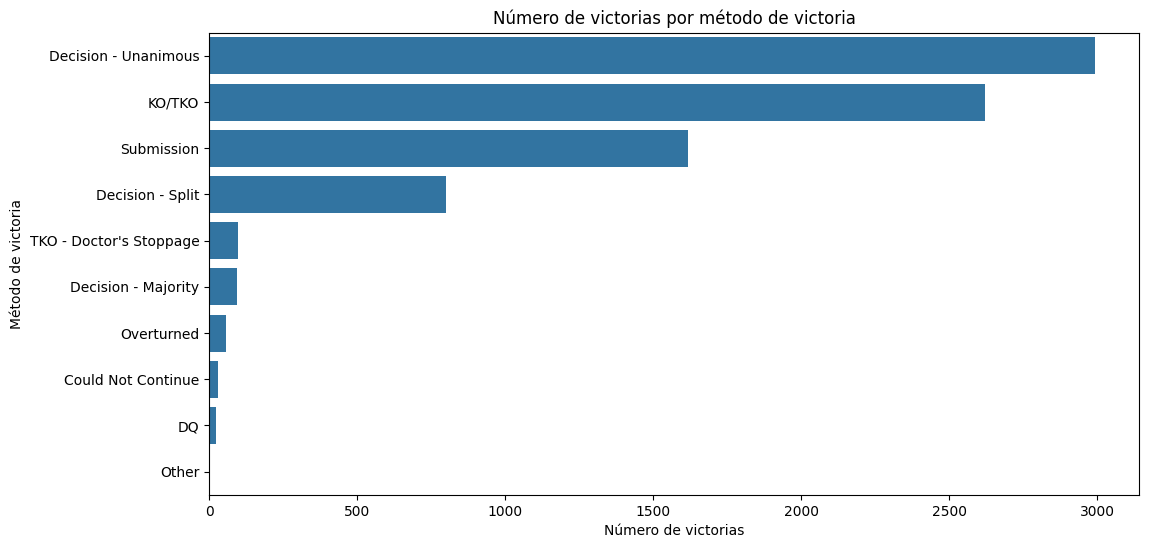

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='metodo_victoria', order=df['metodo_victoria'].value_counts().index)
plt.title('Número de victorias por método de victoria')
plt.xlabel('Número de victorias')
plt.ylabel('Método de victoria')
plt.show()

/tmp/ipython-input-3655379114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winners.values, y=top_winners.index, palette='viridis')


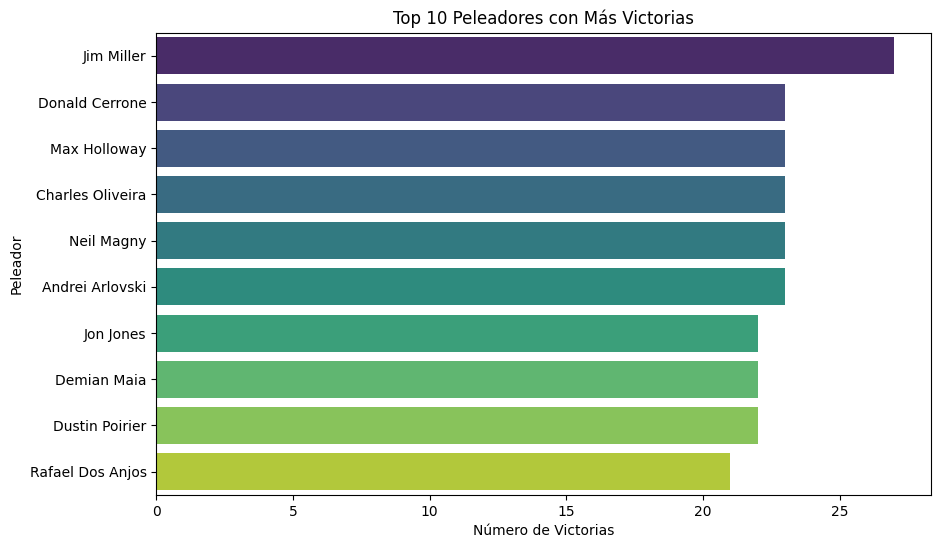

In [ ]:
# Get the value counts of the 'ganador' column
top_winners = df['ganador'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_winners.values, y=top_winners.index, palette='viridis')
plt.title('Top 10 Peleadores con Más Victorias')
plt.xlabel('Número de Victorias')
plt.ylabel('Peleador')
plt.show()

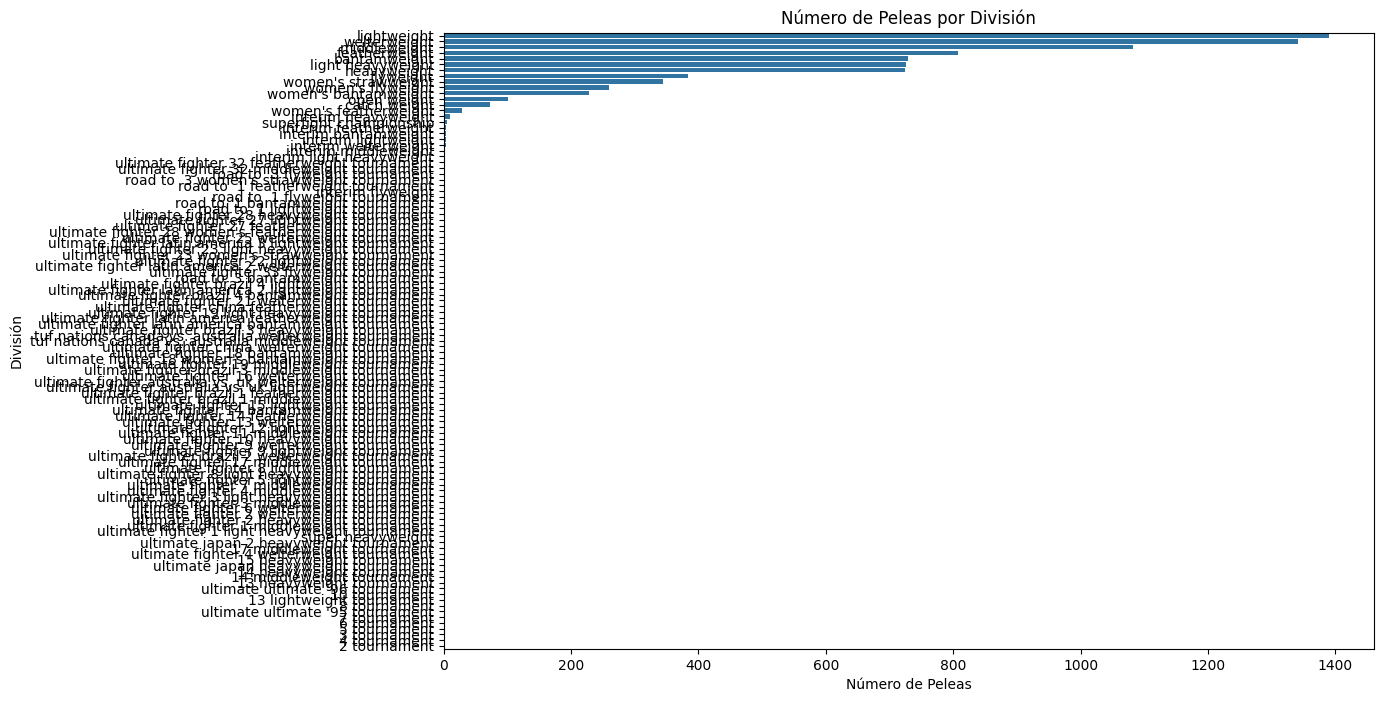

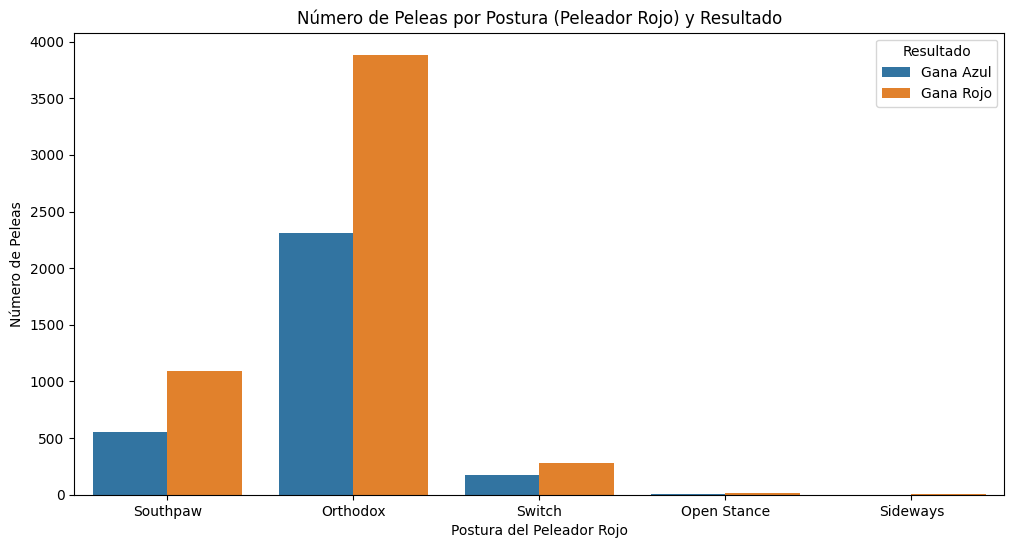

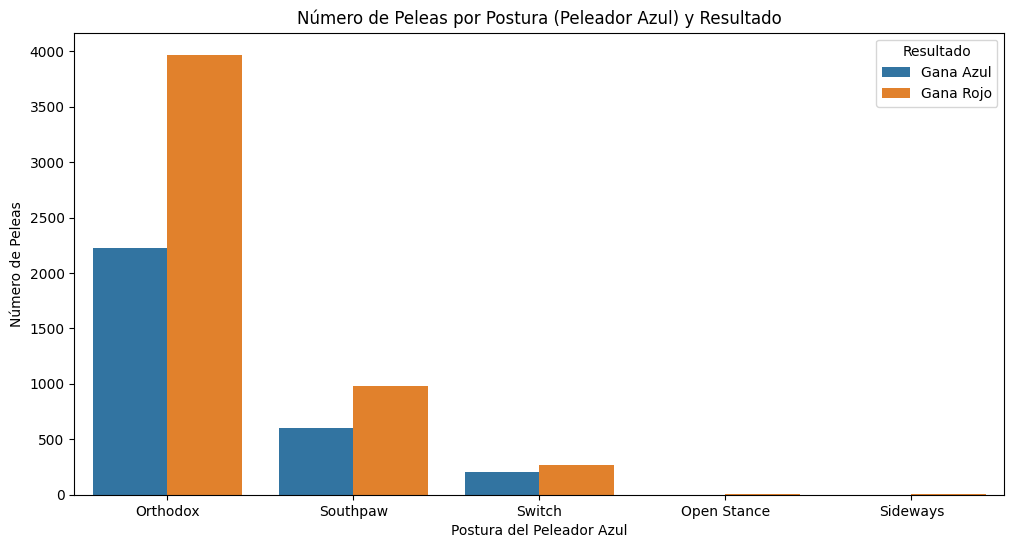

investigacion por tiempo de pelea en segundos

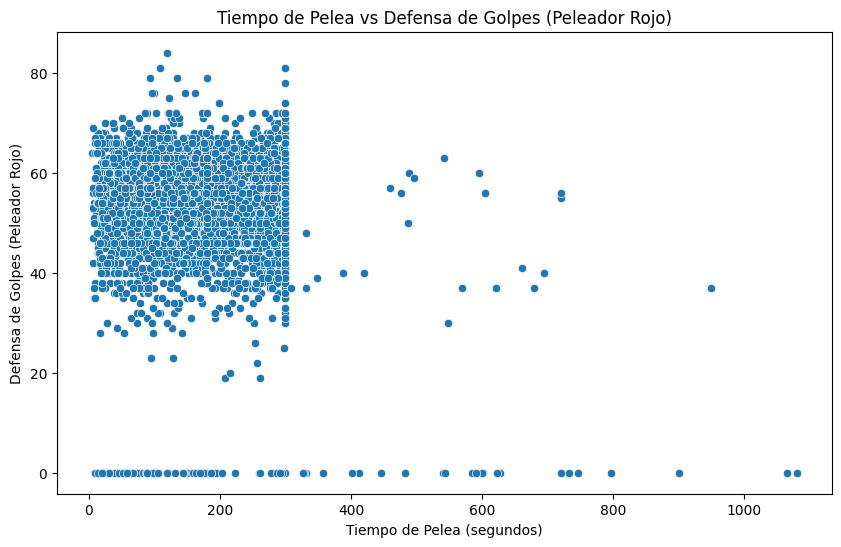

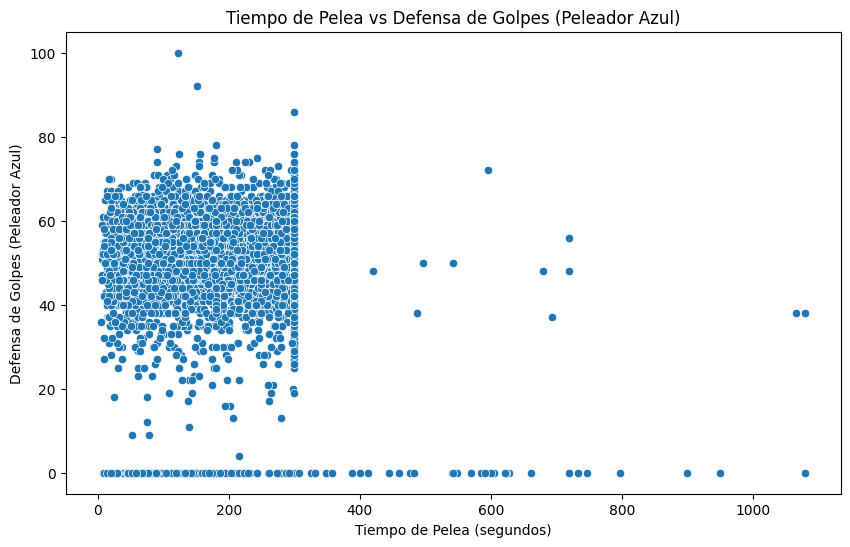

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tiempo_pelea_seg', y='r_defensa_golpes')
plt.title('Tiempo de Pelea vs Defensa de Golpes (Peleador Rojo)')
plt.xlabel('Tiempo de Pelea (segundos)')
plt.ylabel('Defensa de Golpes (Peleador Rojo)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tiempo_pelea_seg', y='b_defensa_golpes')
plt.title('Tiempo de Pelea vs Defensa de Golpes (Peleador Azul)')
plt.xlabel('Tiempo de Pelea (segundos)')
plt.ylabel('Defensa de Golpes (Peleador Azul)')
plt.show()

### **BOXPLOT**

texto

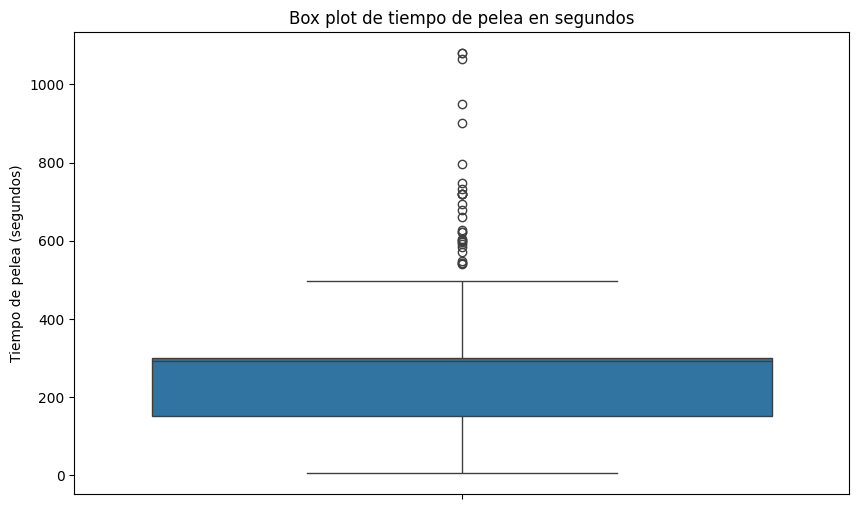

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='tiempo_pelea_seg')
plt.title('Box plot de tiempo de pelea en segundos')
plt.ylabel('Tiempo de pelea (segundos)')
plt.show()

### **Regresión con la variable tiempo**

### **Correlacion de las variables del dataset**



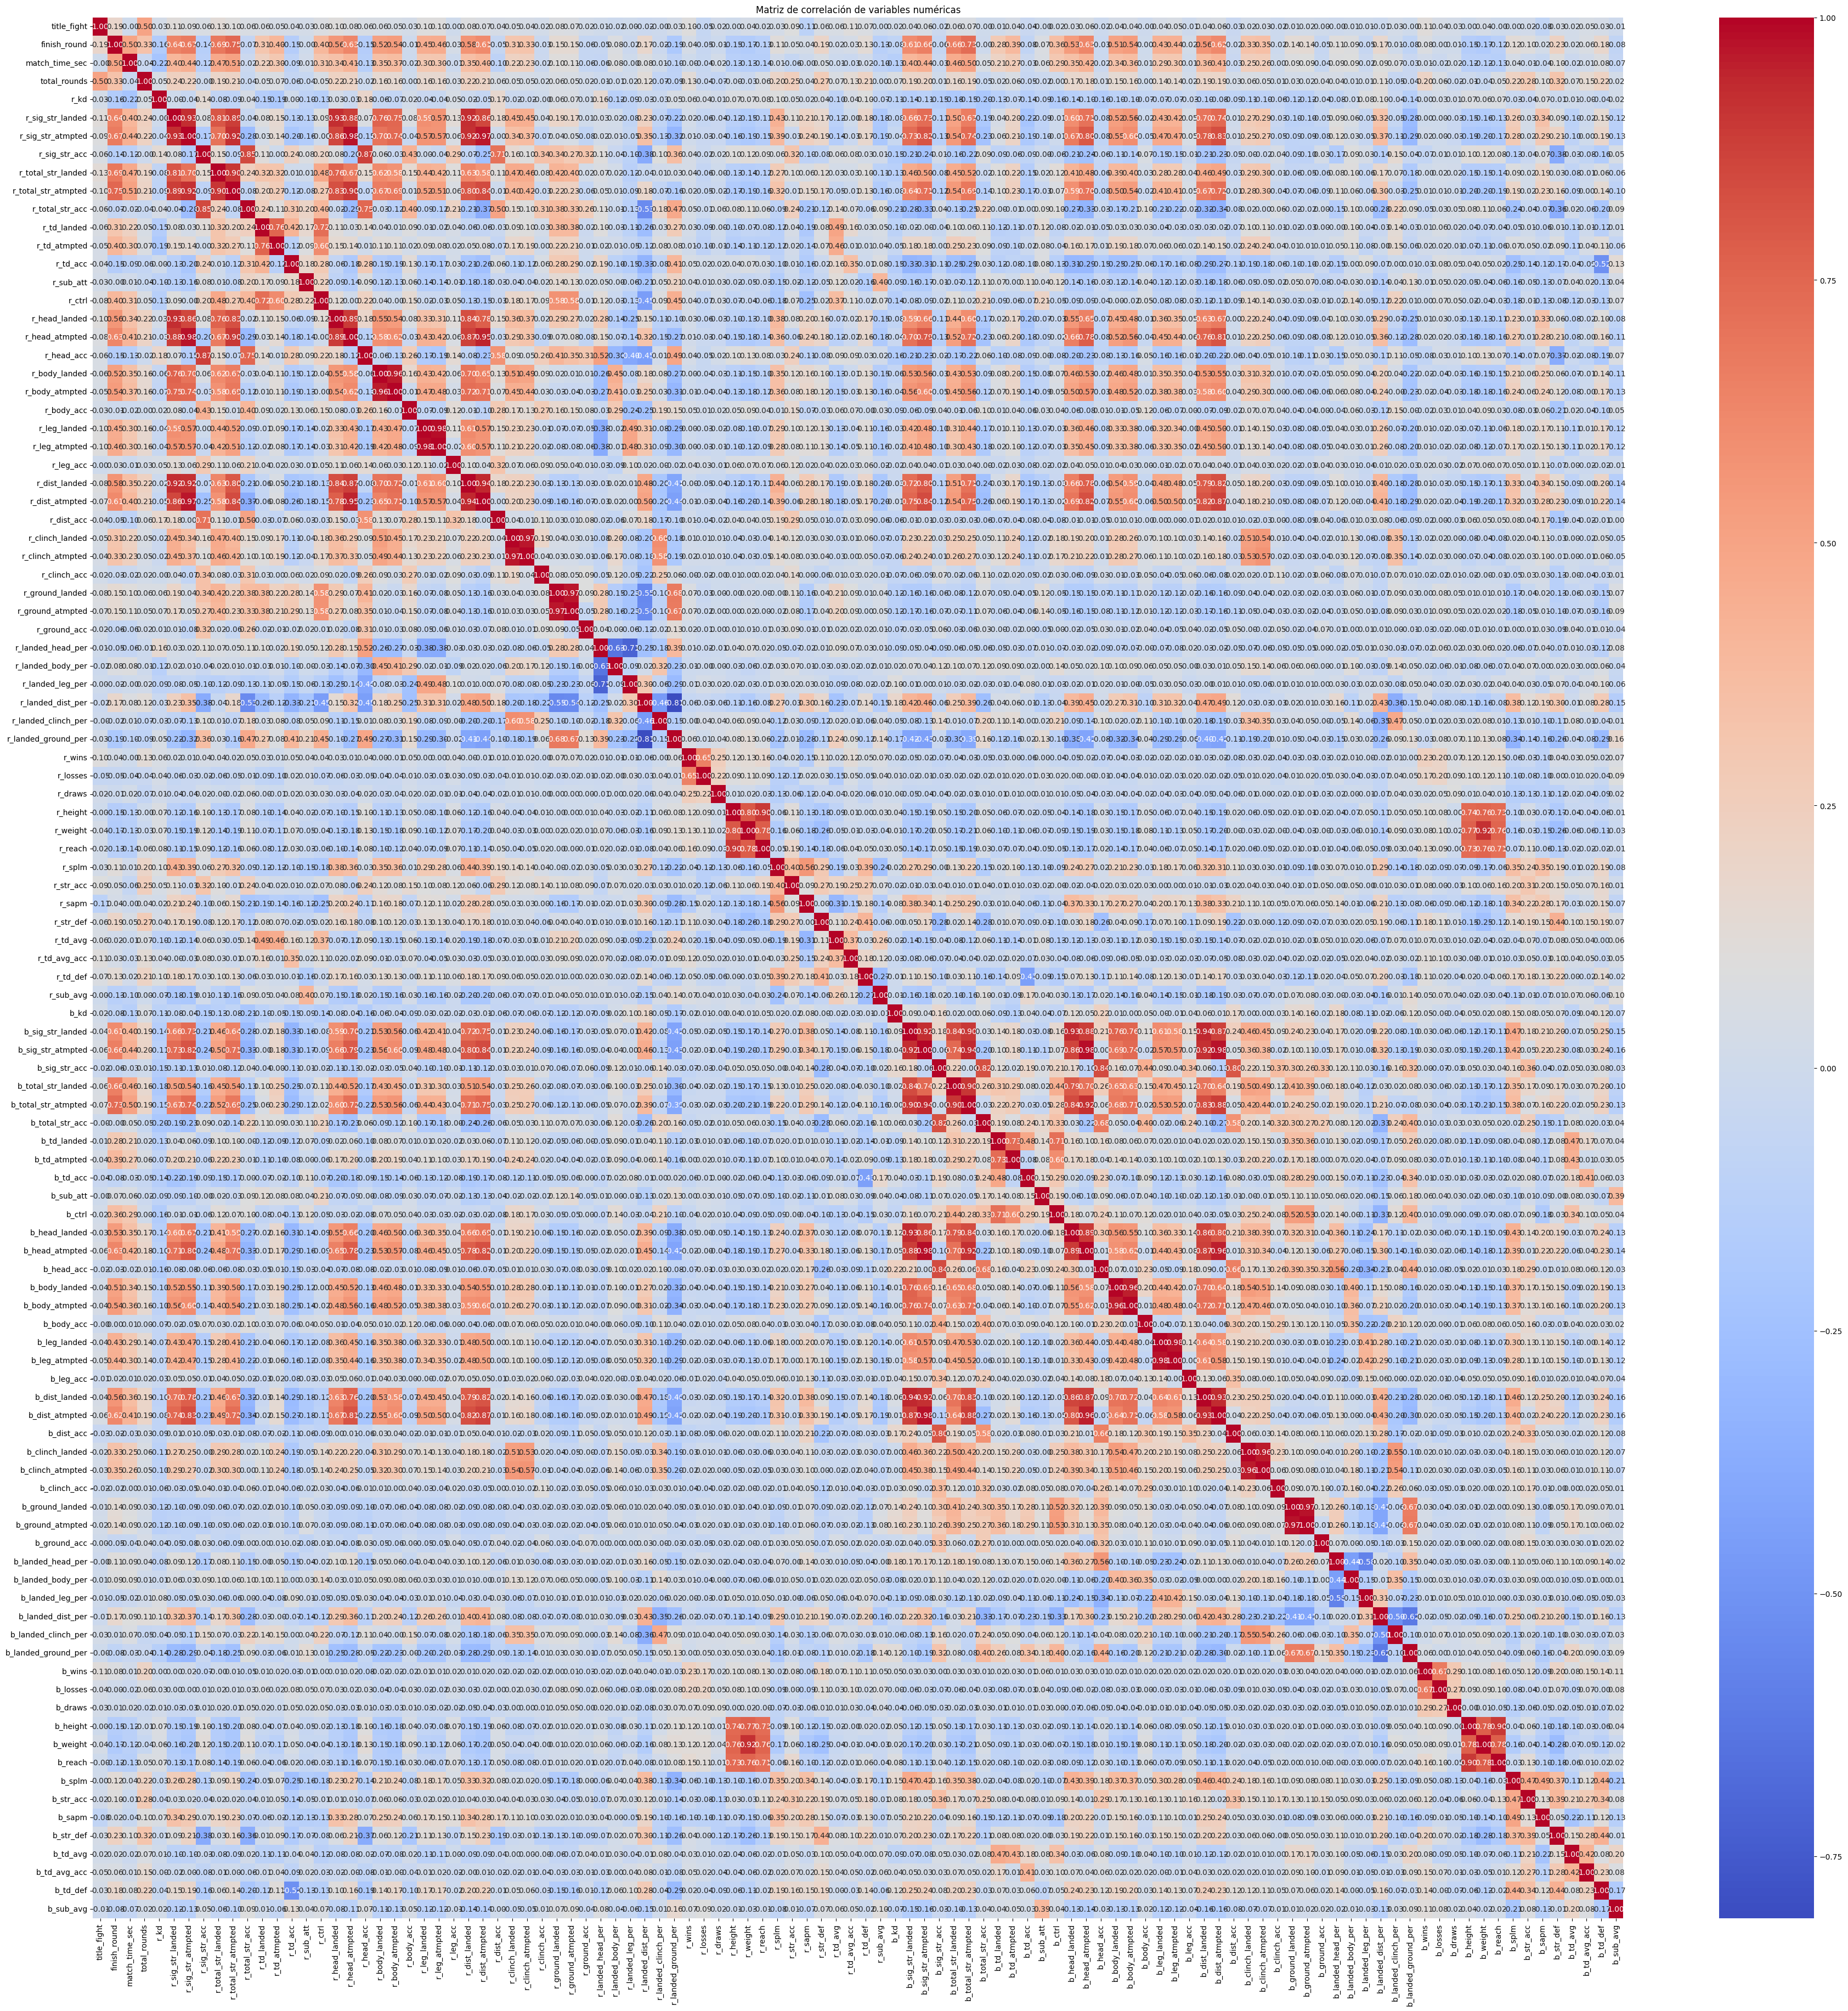

In [ ]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Crear el mapa de calor de correlación con anotaciones
plt.figure(figsize=(45, 45)) # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

### **Modelado**

#### **Modelo de regresion (nombre del modelo)**

Tipo de modelo: Regressor (por ejemplo, Regresión Lineal, Árbol de Decisión Regressor, XGBoost Regressor).

Podrías predecir algo como:

diferencia_de_golpes (golpes rojos - golpes azules)

total_golpes_significativos

duracion_pelea_segundos

puntos_totales (si tienes puntaje por juez o resultado numérico)

#### **Entrenamiento del modelo**

In [ ]:
# Seleccionar la variable objetivo y las características
# Para este ejemplo, usaremos 'Severity' como variable objetivo
# y 'Hora_de_inicio' como característica.
target = 'Severity'
features = ['Mes']

# Eliminar filas con valores nulos en las columnas relevantes


df_cleaned = df.dropna(subset=[target] + features).copy()

# Definir las variables independientes (X) y dependiente (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Ahora puedes proceder a entrenar un modelo de regresión si lo deseas.
# Por ejemplo, para un modelo de regresión lineal:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("\nPrimeras 5 predicciones:", predictions[:5])


Primeras 5 predicciones: [2.27085959 2.25778965 2.23164978 2.29699945 2.25778965]


#### **Metricas del modelo**

In [ ]:

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, predictions)

print("\nMétricas de evaluación del modelo:")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R-squared): {r2:.4f}")


Métricas de evaluación del modelo:
Error Absoluto Medio (MAE): 0.4450
Error Cuadrático Medio (MSE): 0.2991
Raíz del Error Cuadrático Medio (RMSE): 0.5469
Coeficiente de Determinación (R-squared): 0.0060


#### **Modelo de Clasificación (nombre)**

`1` → Gana el peleador rojo

`0` → Gana el peleador azul

Predecir quién ganará la pelea según las características (golpes, peso, altura, experiencia, etc.).

#### **Modelo Clustering**

Tipo de modelo: No supervisado (no usa variable objetivo).

Objetivo: Agrupar peleas o peleadores según similitudes.

ejemplo
Agrupar peleas según sus estadísticas (golpes, derribos, tiempo, peso…)

Agrupar peleadores por estilo o rendimiento promedio.

No hay variable objetivo.
Usas todas las variables numéricas (preprocesadas) para que el algoritmo (por ejemplo, K-Means o DBSCAN) encuentre los patrones por sí mismo.

#### 11. **Resultados y visualizaciones**

El profesor menciona que este es el punto con mas valor porcentual de nota (30%).

modelo depende del resultado obtenido, al no obtener el resultado esperado, justificar si fue bueno o malo y ¿porque?

- En esta seccion, el profe evaluara el nivel de esfuerzo que realicemos, ya sea si hubieramos elegido un modelo o otro.

- si no se cumple la hipótesis no importa, lo importante es que el resultado sea lo máximo posible

(Estadisticas, analisis de valores, comparacion)

#### 12. **Discusión e interpretación para BI**


#### 8. **Conclusión**
corta y precisa.

#### 9. **Bibliografía**

y es necesaria. podemos adicionar o mencionar la librería de ski learn
